# project 3 

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [6]:
df = pd.read_csv('StudentsPerformance.csv')
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [109]:
x = df.iloc[:,5:].values

## dbscan 

In [115]:
dbscan = DBSCAN(eps=2, metric='euclidean', min_samples=8)
dbscan.fit(x)

DBSCAN(eps=2, min_samples=8)

In [116]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [117]:
pca = PCA(n_components=2).fit(x)
pca_2d = pca.transform(x)

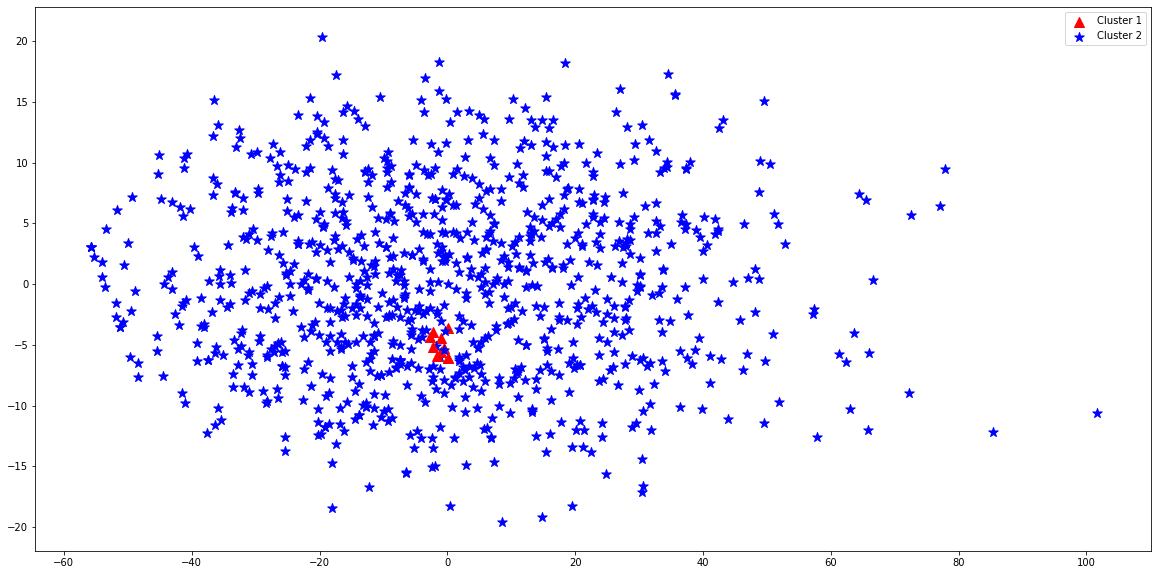

In [118]:
plt.figure(figsize=(20,10))
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='r',marker='^')
    elif dbscan.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],s=100,c='b',marker='*')
plt.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
    

## hierarchical 

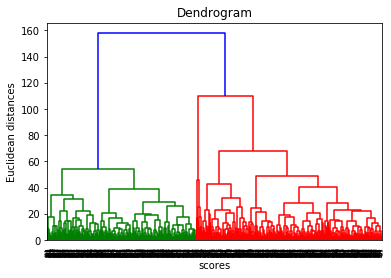

In [110]:
dendrogram = sch.dendrogram(sch.linkage(x, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('scores')
plt.ylabel('Euclidean distances')
plt.show()

In [113]:
X=x
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)
y_hc

array([3, 4, 4, 1, 3, 3, 4, 1, 2, 5, 1, 1, 3, 3, 1, 3, 4, 0, 1, 5, 2, 3,
       5, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 1, 4, 3, 3, 5, 4, 2, 5, 2, 2, 2,
       5, 2, 2, 2, 2, 3, 1, 2, 1, 3, 3, 1, 4, 1, 2, 0, 3, 1, 2, 3, 2, 2,
       1, 2, 2, 5, 2, 2, 1, 2, 1, 1, 0, 3, 2, 2, 1, 1, 1, 2, 1, 3, 4, 3,
       2, 3, 2, 0, 3, 1, 4, 3, 2, 2, 2, 2, 2, 3, 4, 1, 4, 2, 4, 2, 2, 2,
       4, 2, 1, 5, 4, 3, 3, 3, 5, 2, 4, 4, 4, 2, 3, 4, 2, 3, 3, 1, 4, 1,
       3, 3, 3, 1, 1, 2, 2, 2, 3, 2, 5, 1, 3, 0, 4, 2, 3, 4, 2, 2, 2, 1,
       2, 4, 3, 2, 3, 2, 3, 4, 1, 1, 4, 4, 1, 3, 3, 3, 3, 4, 4, 2, 5, 4,
       5, 3, 2, 4, 2, 5, 1, 2, 1, 2, 3, 2, 1, 4, 2, 3, 2, 2, 3, 2, 2, 1,
       5, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 2, 3, 0, 5, 1, 4, 3, 4, 1, 3, 2,
       2, 4, 2, 3, 2, 5, 3, 1, 2, 4, 2, 1, 3, 4, 3, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 3, 3, 2, 2, 2, 1, 3, 2, 3, 1, 2, 2, 3, 3, 3, 3, 3, 1, 4,
       3, 1, 3, 3, 4, 3, 2, 1, 5, 2, 4, 3, 4, 2, 3, 2, 1, 1, 3, 3, 1, 3,
       4, 3, 3, 3, 3, 3, 2, 2, 3, 2, 1, 3, 1, 4, 3,

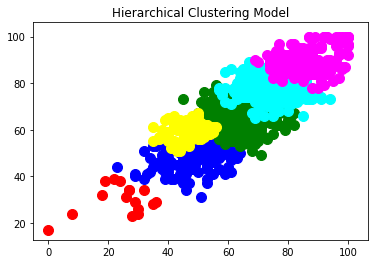

In [114]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100,c='red', label ='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s=100, c='yellow', label ='Cluster 6')
plt.title('Hierarchical Clustering Model')
plt.show()

## k means 

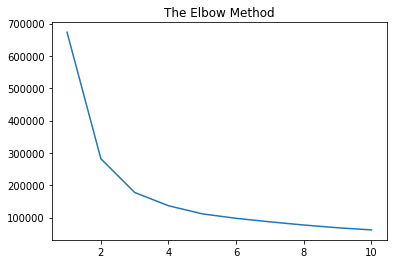

In [121]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.show()

In [130]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([3, 1, 1, 2, 3, 3, 1, 2, 0, 2, 0, 2, 3, 3, 0, 3, 1, 2, 2, 0, 0, 3,
       2, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 2, 1, 3, 3, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 1, 2, 3, 2, 3, 3, 2, 1, 2, 0, 2, 3, 2, 0, 3, 0, 0,
       2, 3, 0, 0, 0, 0, 2, 0, 2, 2, 2, 3, 3, 0, 2, 2, 2, 0, 2, 3, 1, 3,
       0, 3, 3, 2, 3, 2, 1, 3, 0, 3, 0, 0, 3, 3, 1, 2, 1, 0, 1, 0, 0, 3,
       1, 0, 2, 0, 1, 3, 3, 3, 0, 0, 1, 1, 1, 0, 3, 1, 3, 3, 3, 2, 1, 2,
       3, 3, 3, 0, 2, 0, 0, 0, 3, 0, 2, 2, 3, 2, 1, 3, 3, 1, 0, 3, 0, 2,
       0, 1, 3, 0, 3, 0, 3, 1, 2, 2, 1, 1, 2, 3, 3, 3, 3, 1, 1, 0, 2, 1,
       2, 3, 0, 1, 3, 0, 2, 3, 2, 0, 3, 0, 2, 1, 0, 3, 0, 0, 3, 0, 0, 0,
       2, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 0, 3, 2, 0, 0, 1, 3, 1, 2, 3, 0,
       0, 1, 0, 3, 0, 2, 3, 0, 3, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 1, 3, 1,
       0, 2, 3, 3, 3, 0, 0, 0, 2, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 1,
       3, 2, 3, 3, 1, 3, 0, 2, 2, 3, 1, 3, 1, 0, 3, 0, 2, 2, 3, 3, 2, 1,
       1, 3, 3, 3, 3, 3, 0, 3, 3, 0, 2, 3, 2, 1, 3,

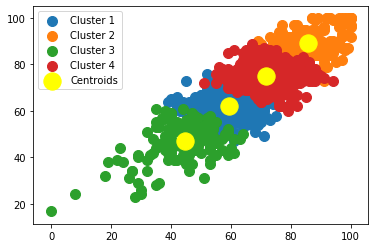

In [127]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100,  label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100,  label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [131]:
print("Accuracy of Kmeans",accuracy_score(y_kmeans,kmeans.labels_))

Accuracy of Kmeans 1.0
